# Etivity-3DM

Prepared by : Damien Martin, Student ID: 10100913, Date Submitted: 29032020

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

## Load the dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [48]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
df. describe()

(number of examples, number of attributes):  (614, 16)


,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


In [49]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.tail()
df. describe()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


## Rescale the Data- we dont need to that in this case as data has been rescaled in previous assignment

Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [51]:
df.describe()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


## Elbow method

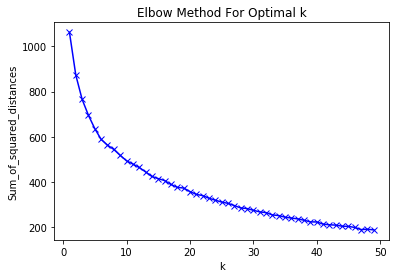

In [52]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


    
    
    

## Elbow and silhoutte method

For n_clusters = 2 The average silhouette_score is : 0.18654028464861305
For n_clusters = 3 The average silhouette_score is : 0.1915495261821749
For n_clusters = 4 The average silhouette_score is : 0.1916831369886384
For n_clusters = 5 The average silhouette_score is : 0.19406539355254115
For n_clusters = 6 The average silhouette_score is : 0.18578968352085826
For n_clusters = 7 The average silhouette_score is : 0.20791263346301986
For n_clusters = 8 The average silhouette_score is : 0.21141007857999405
For n_clusters = 9 The average silhouette_score is : 0.2111857575337338
For n_clusters = 10 The average silhouette_score is : 0.2172282681581126
For n_clusters = 11 The average silhouette_score is : 0.23323119506717147
For n_clusters = 12 The average silhouette_score is : 0.23121306980918738
For n_clusters = 13 The average silhouette_score is : 0.23560205778405
For n_clusters = 14 The average silhouette_score is : 0.23335571648663672
For n_clusters = 15 The average silhouette_score is :

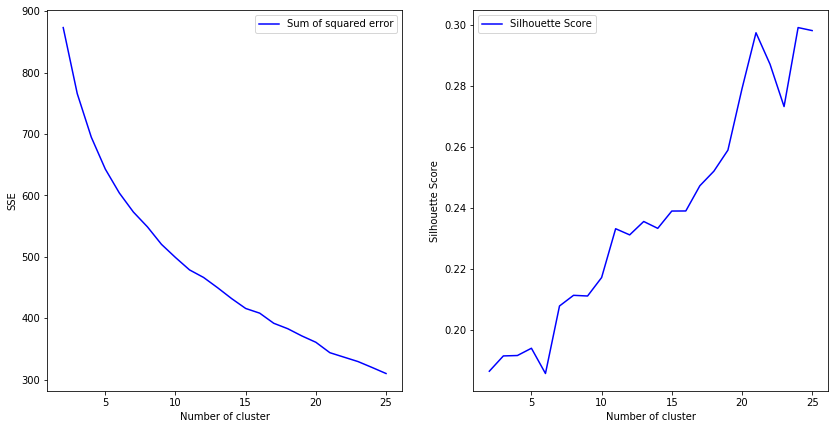

In [53]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(data)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(data, cluster_labels)
   ss.append(silhouette_avg)
   print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show() 
    
    
    
    

####  I think its hard with absolute certainty to say where the optimal k is but i think that this plots indicates that it is between 3 and 4. My approach would be to cluster with these values and have a look at the purity. 


## Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [54]:
colors = np.array(['orange', 'blue', 'lime', 'purple', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _=plt.title(title)
    _=plt.legend()
    _=plt.xlabel('x')
    _=plt.ylabel('y')

# K-Means Clustering

### Number of clusters -Three first (with n_init =10 and max_iter =1000)

In [55]:
k = 5

In [56]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [57]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [58]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


#### Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n points mapped into an abstract Cartesian space. 

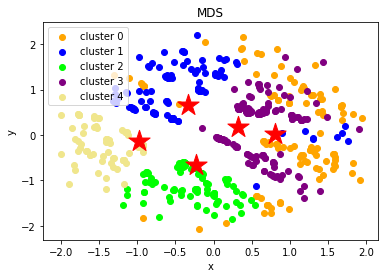

In [59]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### Now lets look at four clusters (with n_init =10 and max_iter =1000)

In [14]:
k = 4

In [15]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [16]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [17]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


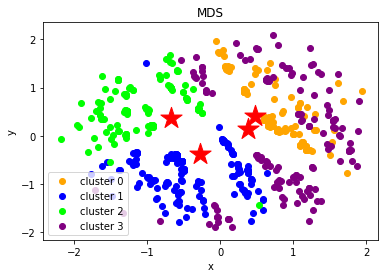

In [18]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### NUMBER OF ITERATIONS (N=100,200,500,1000) for k =3 and n_init =10
### max_iter = 100

In [19]:
k = 4

In [20]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=100).fit(data)

In [21]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [22]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


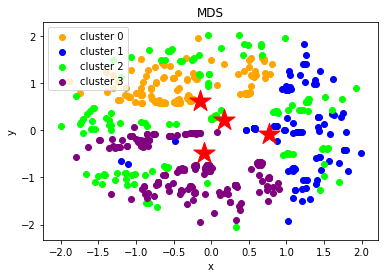

In [23]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### max_iter = 200

In [24]:
k = 4

In [25]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=200).fit(data)

In [26]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [27]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


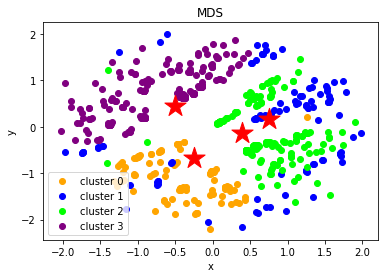

In [28]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

### max_iter =500

In [29]:
k = 4

In [30]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=500).fit(data)

In [31]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [32]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


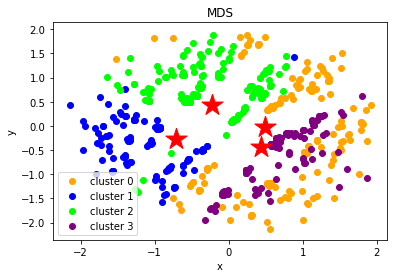

In [33]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results

In [34]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


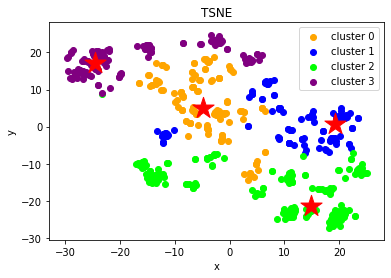

In [35]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

  ## Alternative clustering technique: MEAN SHIFT

Automatically created module for IPython interactive environment
number of estimated clusters : 3


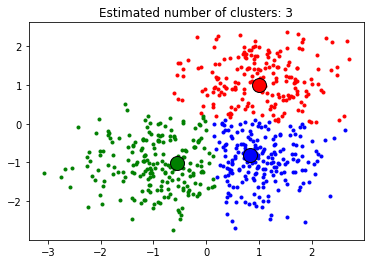

In [60]:

print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
#  Data
centers = [[1, 1], [-1, -1], [1, -1]]
data, _ = make_blobs(n_samples=614, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=614)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


  ## Alternative clustering technique: DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 31
Homogeneity: 0.517
Completeness: 0.706
V-measure: 0.597
Adjusted Rand Index: 0.513
Adjusted Mutual Information: 0.596
Silhouette Coefficient: 0.392


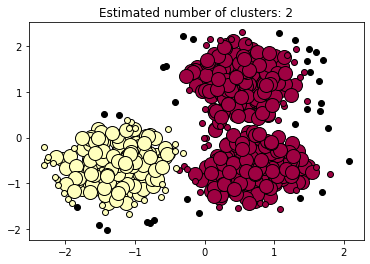

In [61]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(n_samples=614, centers=centers, cluster_std=0.5,
                            random_state=0)

data = StandardScaler().fit_transform(data)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

  ## Alternative clustering technique: DBSCAN

#### In a separate module we looked at the idea of purity of a cluster
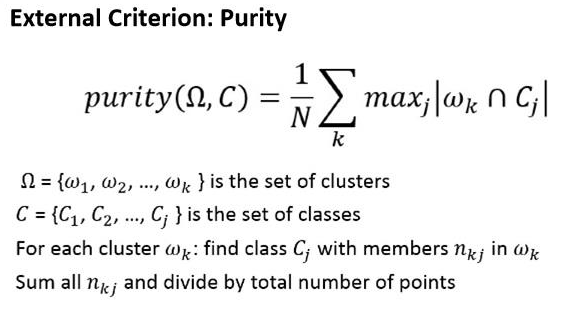


### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [38]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [39]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,3
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,3


In [40]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,1
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,1


#### Compute the mean value of each attribute for each cluster

In [41]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.265306,0.893335,1.091463,0.715476,0.510204,0.843537,0.034014,0.673469,0.000000,0.129252,0.047619,0.299320,0.108844,0.469388,0.000000,0.866672
1,0.094488,0.907868,1.008485,0.738386,0.897638,0.559055,0.015748,0.000000,0.015748,0.133858,0.062992,0.228346,0.645669,0.000000,0.755906,0.777447
2,0.322061,0.924632,1.128813,0.714251,0.985507,0.879227,0.019324,1.000000,0.000000,0.154589,0.043478,0.193237,0.652174,0.000000,0.932367,0.915538
3,0.260652,0.938096,1.042207,0.685714,0.992481,0.842105,0.015038,0.691729,0.007519,0.105263,0.060150,0.157895,0.000000,1.000000,1.000000,0.857415


#### Conclusion
still to be done